In [3]:
from vif.falcon.oracle.guided_oracle.expressions import (
    OracleExpression,
    angle,
    aligned,
    color,
    count,
    mirrored,
    placement,
    position,
    size,
    shape,
    within,
)


In [5]:

from vif.models.detection import BoundingBox, SegmentationMask
from vif.utils.detection_utils import get_bounding_boxes, get_segmentation_masks
import sys
from loguru import logger
import os
from google import genai
from google.genai import types as genTypes
from datasets import load_dataset
from PIL import Image

gclient = genai.Client(
        api_key=os.environ.get("GOOGLE_API_KEY"),
        http_options=genTypes.HttpOptions(api_version="v1alpha"),
    )


def box_from_feature( feature: str, image: Image.Image) -> list[BoundingBox]:

        boxes, _ = get_bounding_boxes(
            image, gclient, feature
        )

        return boxes

def segments_from_feature(
         feature: str, image: Image.Image
    ) -> list[SegmentationMask]:

        segs, _ = get_segmentation_masks(
            image,
            gclient,
            feature
        )
        segments += segs
        return segments


In [9]:
logger.configure(handlers=[{"sink": sys.stdout, "level": "WARNING"}])
veritikz_dataset = load_dataset("CharlyR/VeriTikz", "full", split="train")
i=0

Make the body of the bee longer, and pointy
False


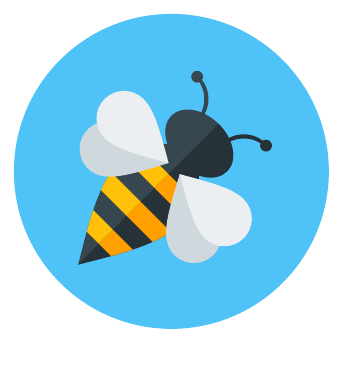

In [10]:
row = veritikz_dataset[i]

perfect_image = row["theoretical_perfect_image"]
original_image = row["original_image"]

print(row["instruction"])
print(row["expected"])
display(perfect_image)
i+=1 

In [24]:
def test_valid_customization() -> bool:
        return count("all the parts of the wings",4)

In [26]:
expression: OracleExpression = test_valid_customization()
result, feedback = expression.evaluate(
            original_image=original_image,
            custom_image=perfect_image,
            segment_function=segments_from_feature,
            box_function=box_from_feature,
        )

2025-11-18 13:47:27.699 | WARNING  | vif.utils.detection_utils:log_and_append_token_data:329 - box detection worked.


In [27]:
result

False

In [28]:
feedback

['The number of all the parts of the wings is 5, but should be 4.']